#Final Project
My name is Karen Flora Da Cruz Sabão. In this notebook I analysed the data of a dataset called Cause of Deaths which you can find on kaggle through the following link https://www.kaggle.com/datasets/iamsouravbanerjee/cause-of-deaths-aroundn-the-world. To accomplish a reasonable analysis
I followed some steps :


1. Data Visualization and Exploration
2. Data Preparation
3. Data Quality -> *Missing values*
4. Data Cleaning
5. Apply Data Mining Algorithm



*  Additional information or comment presented prior to operation


*È stato un processo piacevole, pieno di bug. Spero che sia all'altezza delle aspettative!*

First we load all the required libraries.







In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier,BaggingClassifier)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


*  Load the dataset




In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/DataMining-Final Project-Karen Sabão

/content/drive/MyDrive/DataMining-Final Project-Karen Sabão



*   Import the dataset



In [4]:
df = pd.read_csv("cause_of_deaths.csv")



*  Next we define some of the parameters required to run the experiments like the number of estimators used in each ensembles and the random variable to be able to reproduce the results. I defined the "n_estimators" as the number of years of data available in the set (i.e. the number of years recorded in the dataset) and random variable that   will be the "Country/Territory Code" for ensure that we can repeat analyzes consistently for each country/territory.




In [5]:
n_estimators = df['Year'].nunique()
random_var = 'Code'

In [6]:
n_estimators

30

####Data Visualization and Exploration

In [7]:
df

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139



*   Let's know more about our dataset!A essential information is that we have 32 numerical values and 2 categorical.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [ ]:
df.describe(include=['O'])

,Country/Territory,Code
count,6120,6120
unique,204,204
top,Afghanistan,AFG
freq,30,30




*  Provides a comprehensive summary of all columns in the DataFrame, including both numerical and categorical data.

In [ ]:
df.describe(include='all')

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120,6120,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
unique,204,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,NaN,NaN,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,NaN,NaN,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,NaN,NaN,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,NaN,NaN,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000




* Offers more customization options for generating summary statistics. I can see that the count gives the total number of rows, the mean of the years that occur the diseases(2004 approximately) and the minimum and maximum year that the dataset presents (1990 and 2019). Although is difficult to see in the table which disease is causing more deaths.For this reason, we will resort to graphics later on for a better visualization.



In [ ]:
df.describe(percentiles=None, include=None, exclude=None)

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


It's important to usually check your dataset dimension!

In [5]:
n_rows, n_columns = df.shape
print(f'Number of rows: {n_rows}\nNumber of columns: {n_columns}')

Number of rows: 6120
Number of columns: 34


####Data Preparation vs Data Quality(Missing Values)


*  Checking the unique values ​​in the country/Territory column



In [10]:
df['Country/Territory'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'G



*  Count of missing values ​​per column


In [24]:
df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

Wow! We can see that there's no missing values in the diseases columns



*  View the first rows of the dataset to understand its structure



In [12]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816




*   View the distribution of deaths by year



In [13]:
plt.figure(figsize=(10, 6))
df.groupby('Year').sum()

<ipython-input-13-1962fce4abab>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Year').sum()


,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Year,,,,,,,,,,,,,,,,,,,,,
1990,432253,560616,147156,756808,840297,460460,372497,302419,336059,56133,...,661085,600925,87951,655975,1112770,3092759,1012423,1854392,123123,166343
1991,428621,583166,150875,729145,858984,454375,383689,298271,430725,61890,...,679630,613589,87813,631013,1117024,3148288,1026870,1877515,123941,165276
1992,426440,605894,154886,700664,856415,447056,407176,299300,540070,66826,...,702253,630160,88435,606015,1125566,3207816,1042953,1903759,124995,163687
1993,420836,629571,160249,674219,862216,445434,432858,293564,664463,71603,...,728077,647255,90036,583919,1137444,3266612,1067730,1939556,127493,161899
1994,413799,652176,164381,649801,855671,443350,441971,293148,800169,76717,...,751254,665365,90897,564046,1153642,3297292,1089331,1967669,129611,159423
1995,409826,674815,168882,723095,862626,437303,444246,290551,938440,79985,...,773490,683701,90353,641084,1162799,3313295,1104380,1984263,128523,157173
1996,417259,696665,173822,671977,872476,423296,432673,287746,1061580,81704,...,799023,704624,88861,593826,1162809,3342591,1115241,1995513,126804,153406
1997,400893,717342,179347,647682,892946,413405,427316,289467,1174154,82572,...,827734,731048,87371,572372,1169798,3381872,1128962,2014659,126274,151902
1998,393364,738768,185097,620498,901338,407205,431984,289304,1303651,85087,...,854415,758681,86679,549543,1177827,3401426,1141509,2030600,124746,149563


<Figure size 1000x600 with 0 Axes>



*   We can see that most diseases have decreased as a cause of death over the years, but there are two that have caused the most deaths, but it is difficult to say which ones, as there are several diseases, some were assigned the same identification colors in the graph, therefore we will resort to other methods.


<Figure size 1000x600 with 0 Axes>

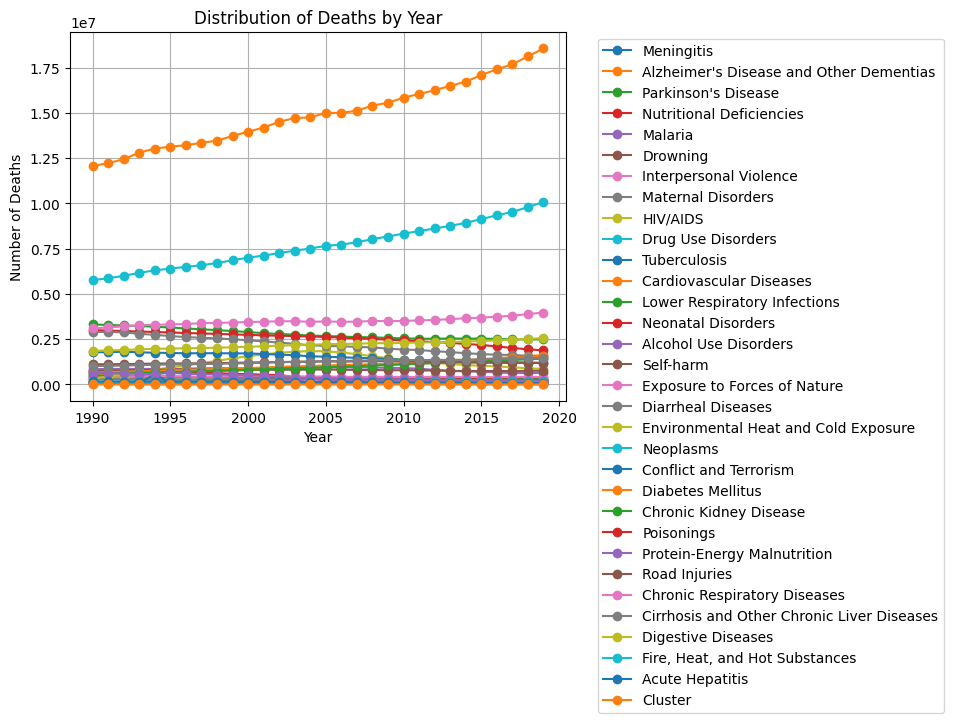

In [87]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('Year').sum(numeric_only=True)
df_grouped.drop(columns=['Code'], inplace=True, errors='ignore')
df_grouped.plot(kind='line', marker='o')
plt.title('Distribution of Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()





*   Visualize the top 10 causes of death

  Now is easier to see that cardiovascular diseases is the principal cause of deaths




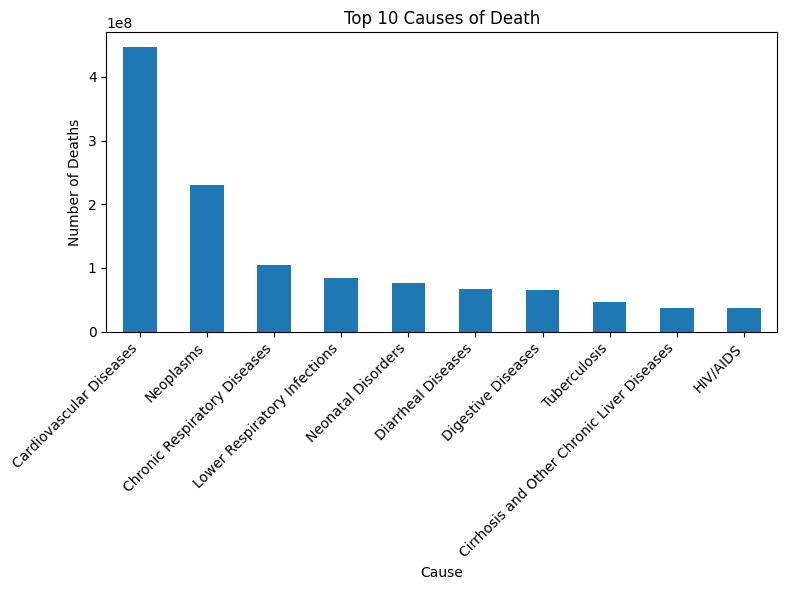

In [88]:
top_causes = df.drop(['Country/Territory', 'Code', 'Year'], axis=1).sum(numeric_only=True).sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
top_causes.plot(kind='bar')
plt.title('Top 10 Causes of Death')
plt.xlabel('Cause')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

####Data Cleaning



*  Now comes the phase of dealing with missing values ​​(if necessary). we saw that there are no missing values. But just to check:
I could fill missing values ​​with zero or the mean. Nothing will happened cause there are no missing values.

In [8]:
df.fillna(0, inplace=True)

In [ ]:
column_means = df.mean()
df.fillna(column_means, inplace=True)



*   Recheck for missing values


In [11]:
df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

There are no duplicates values, so there's no need to treat.

In [12]:
print("Number of duplicates before removal:", df.duplicated().sum())


Number of duplicates before removal: 0


####Data Mining Algorithm (Clustering)
I did:  -Selecting relevant columns for clustering

-Standardize the features

-Apply KMeans clustering

-Add the cluster labels back to the original dataframe

In [14]:
features = df.drop(['Country/Territory', 'Code', 'Year'], axis=1)
numeric_columns = features.select_dtypes(include=['float64', 'int64']).columns
numeric_features = features[numeric_columns]
scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(numeric_features)
scaled_features = pd.DataFrame(scaled_numeric_features, columns=numeric_columns)

In [ ]:
num_clusters = 5
n_init=10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


In [17]:
df['Cluster'] = clusters

* Based on the clustering analysis, we might hypothesize that:
Hypothesis: There are distinct groups of countries with similar causes of death patterns. These groups might correspond to different levels of healthcare development or geographical regions.

######Visualize the distribution of clusters

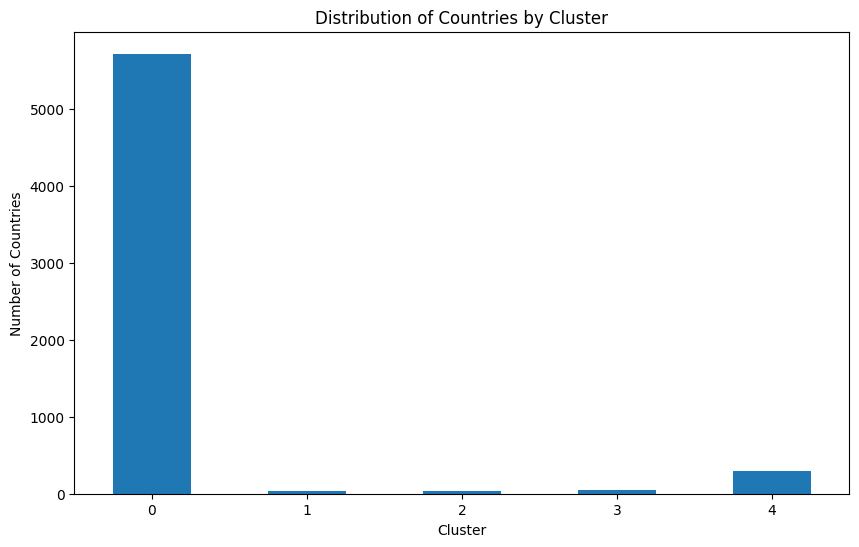

In [18]:
plt.figure(figsize=(10, 6))
df['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Countries by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.xticks(rotation=0)
plt.show()


######Visualize the distribution of causes of death by cluster

* The fact that the first cluster contains the majority of countries suggests that there might be a common pattern among a large number of countries.
This could indicate that these countries share certain similarities in terms of health outcomes or other factors related to causes of death.
The second and third clusters having higher average numbers of deaths for various causes could imply that countries in these clusters face more significant health challenges or have higher disease burdens. This might indicate a need for focused attention on healthcare infrastructure, disease prevention, and intervention strategies in these clusters.However, it's important to note that these are initial observations and conclusions based solely on the clustering results we need further analysis.

<Figure size 600x400 with 0 Axes>

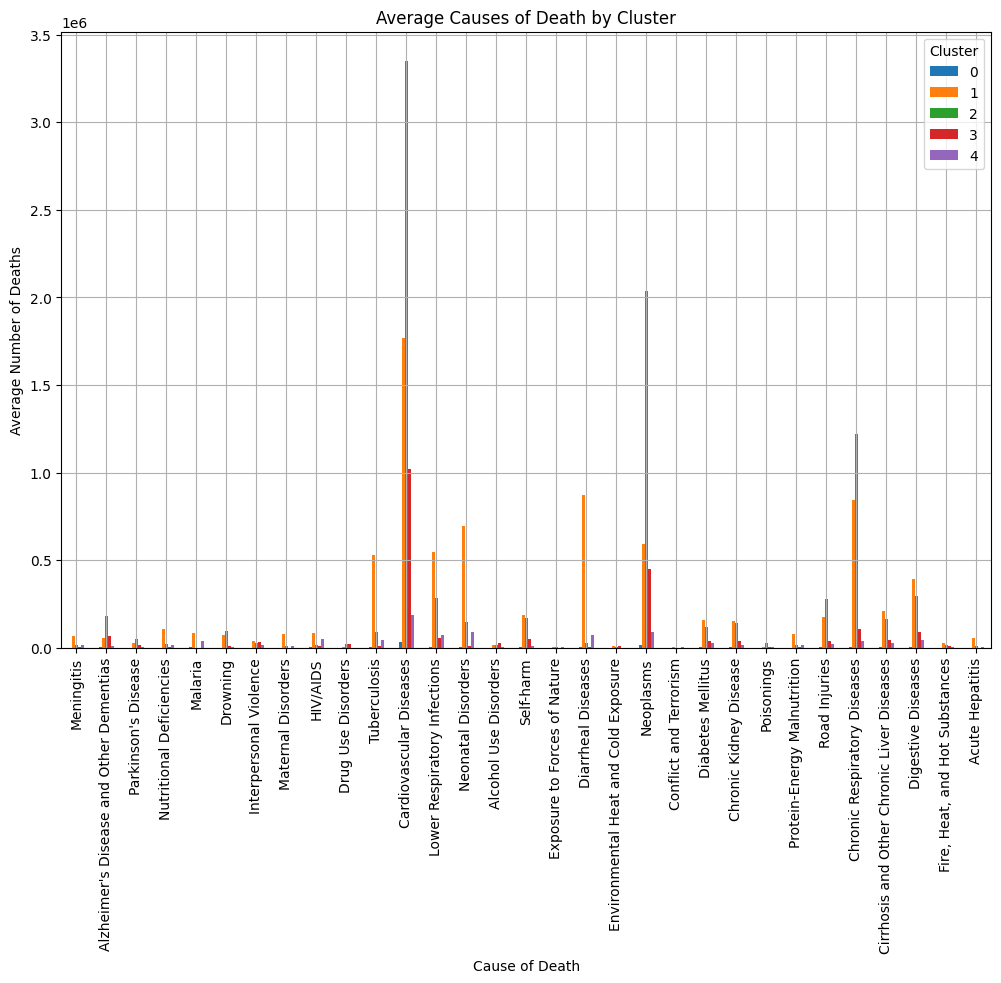

In [19]:
cluster_cause_means = df.groupby('Cluster').mean(numeric_only=True).drop(['Year'], axis=1)
plt.figure(figsize=(6, 4))
cluster_cause_means.T.plot(kind='bar', figsize=(12, 8))
plt.title('Average Causes of Death by Cluster')
plt.xlabel('Cause of Death')
plt.ylabel('Average Number of Deaths')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.grid()
plt.show()

##### Visualization of the correlation matrix between the variables
* Diagonal cells of the matrix (from top left to bottom right) always have a correlation of 1, because a variable is perfectly correlated with itself. Lighter colors represent positive correlation values, while darker colors represent negative correlation values. For example,we can see that Nutritional deficiencies are higly positively related to Protein-Energy Malnutrition.

<ipython-input-22-c25d3ffa9e2a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


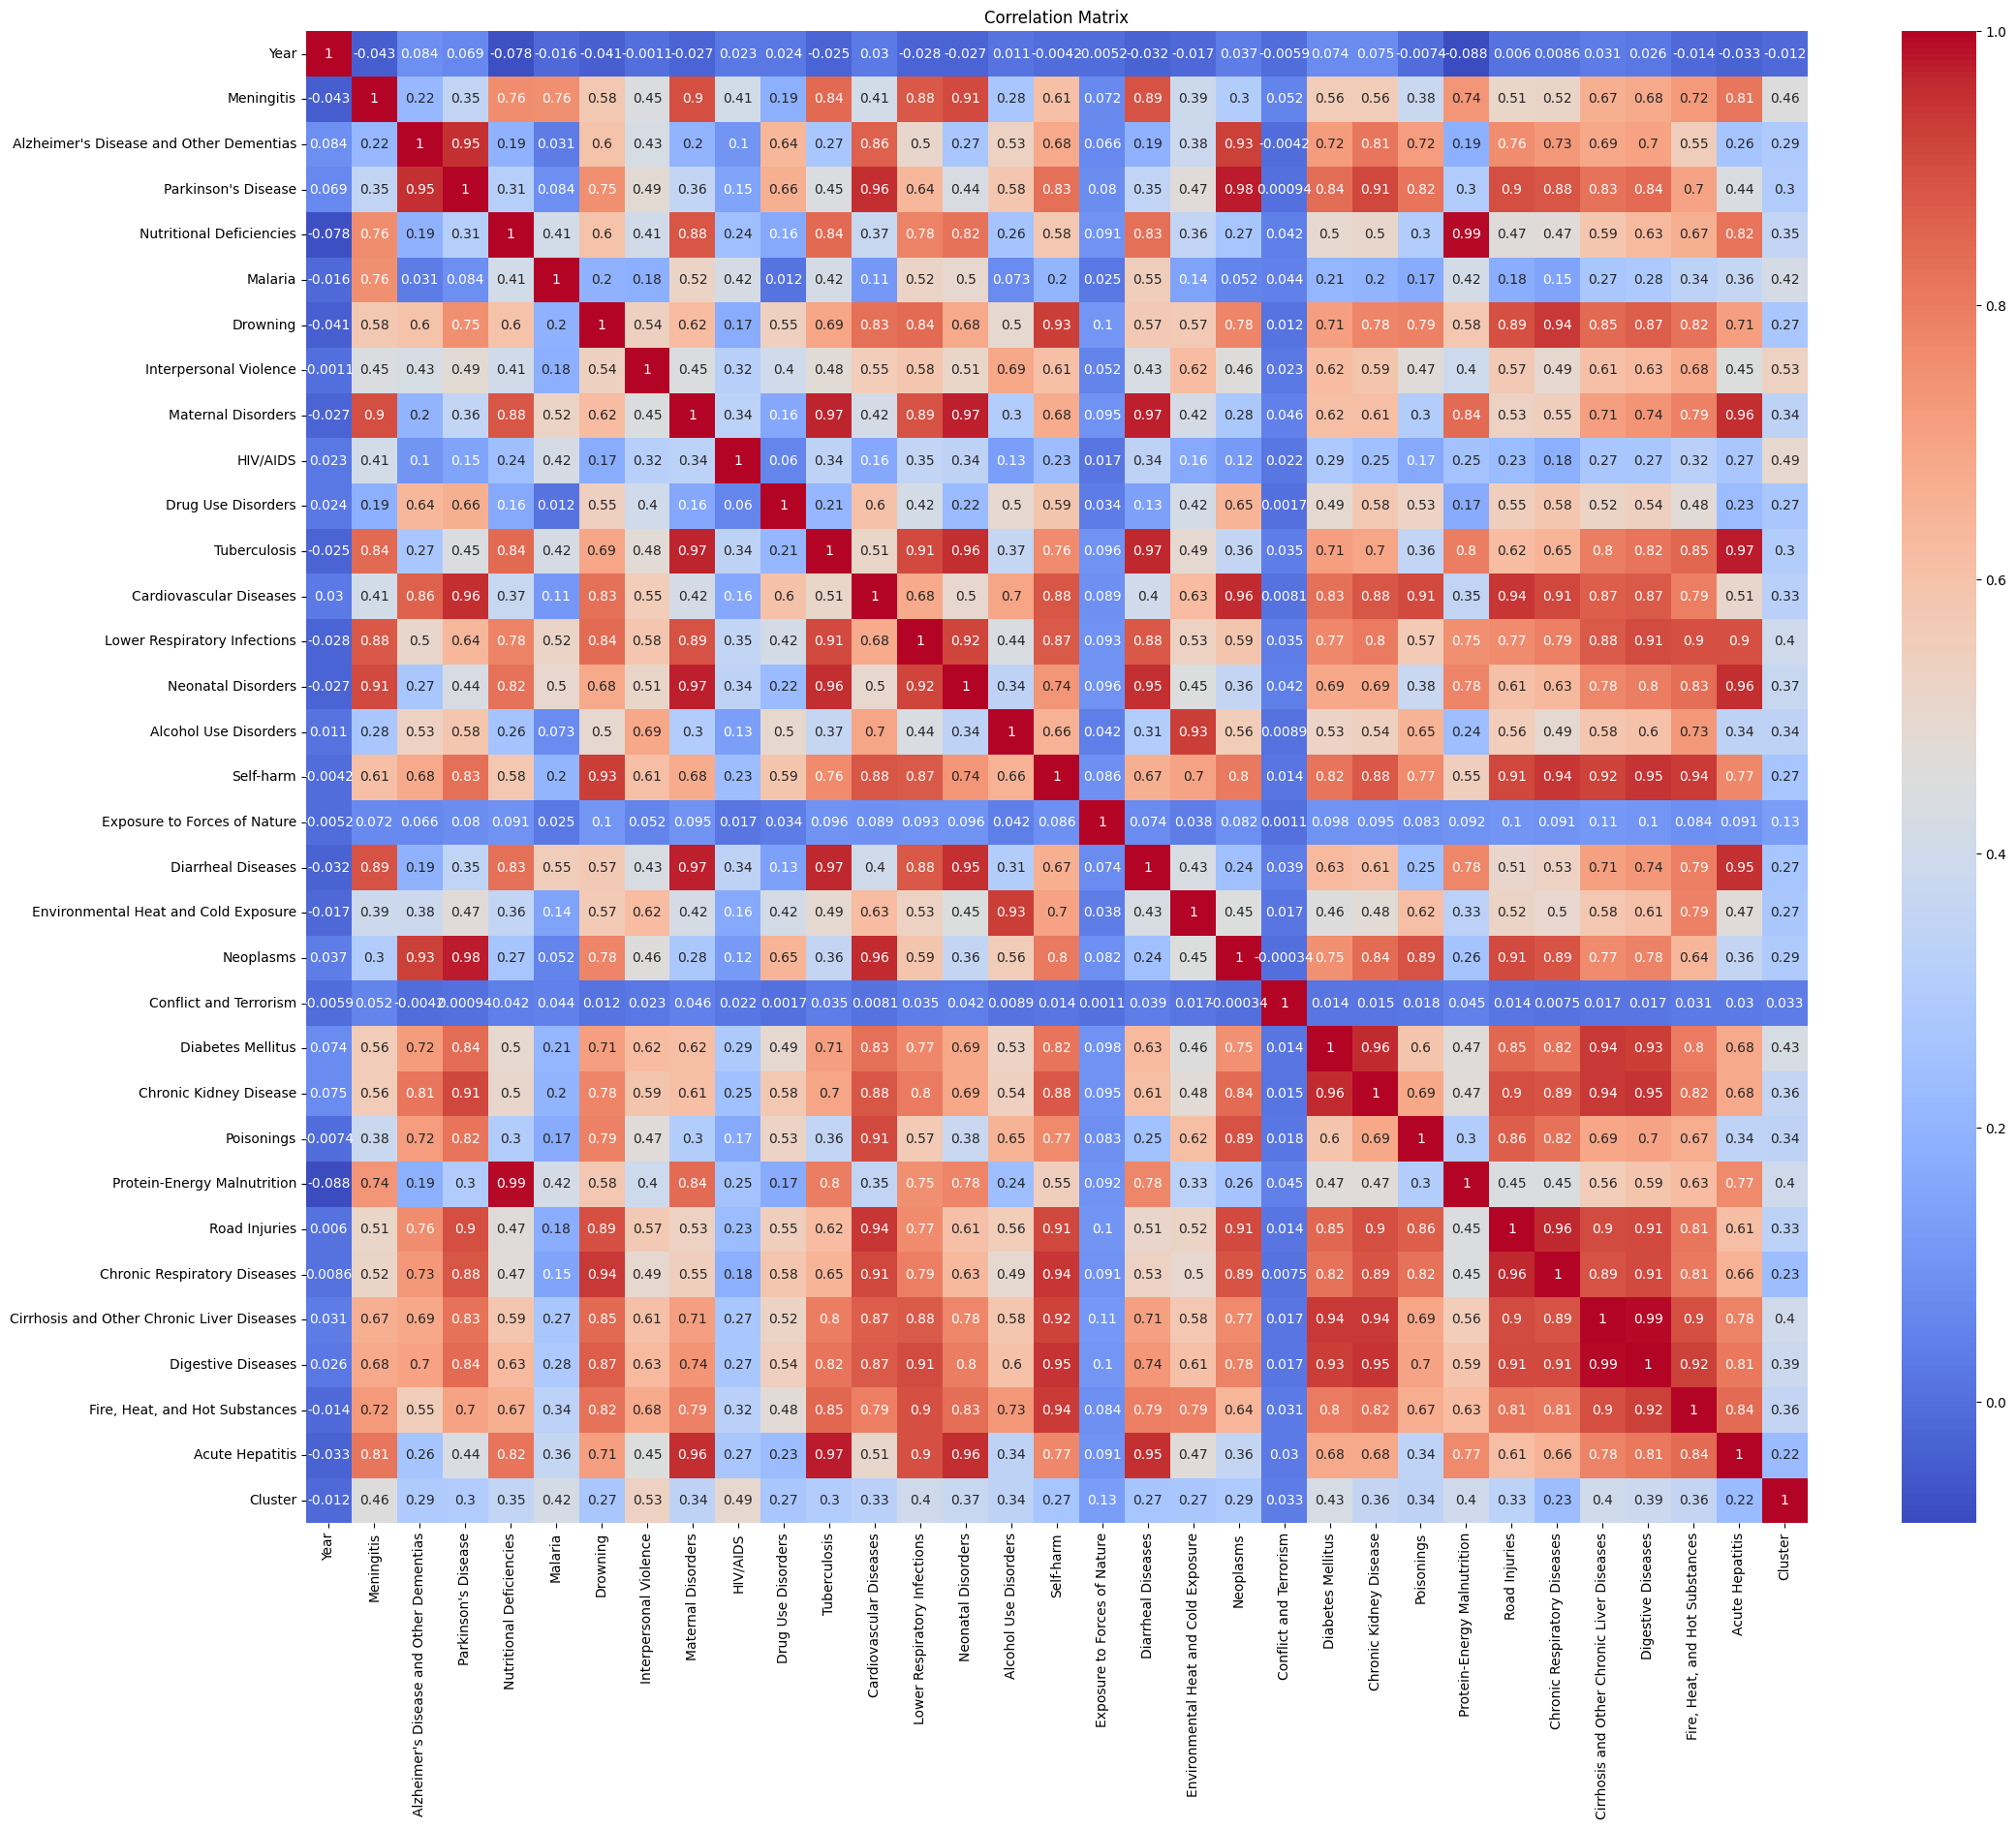

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Visualization of the distribution of deaths per year

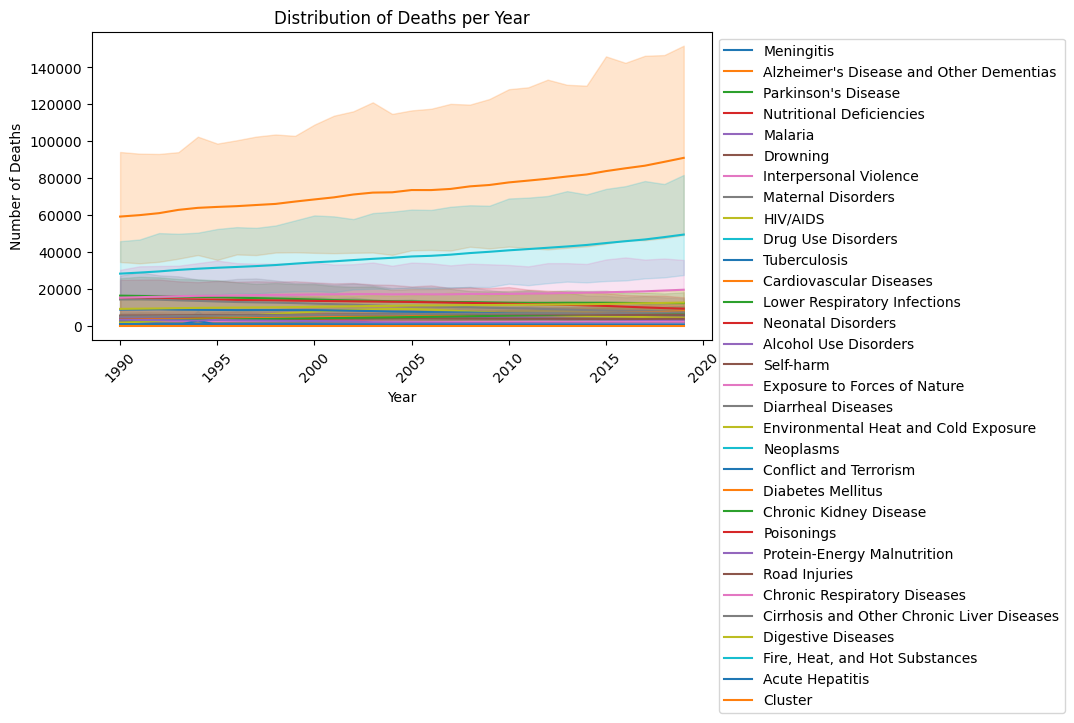

In [26]:
plt.figure(figsize=(8, 4))
death_columns = df.columns[3:]
for col in death_columns:
    sns.lineplot(x='Year', y=col, data=df, label=col)
plt.title('Distribution of Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

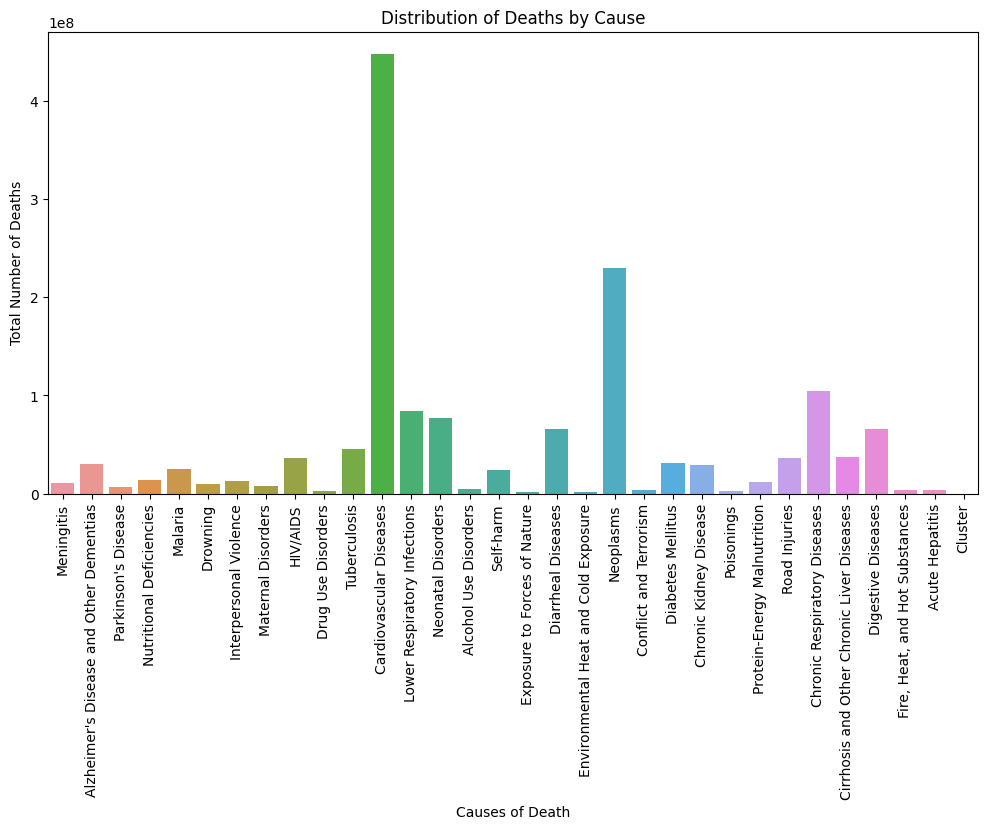

In [32]:
cause_columns = df.columns[3:]  # Columns for different causes
cause_sum = df[cause_columns].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=cause_sum.index, y=cause_sum.values)
plt.xticks(rotation=90)
plt.xlabel("Causes of Death")
plt.ylabel("Total Number of Deaths")
plt.title("Distribution of Deaths by Cause")
plt.show()

####Ensemble methods
Let's use some models Ensembels in order to improve predictive performance, enhance generalization, and reduce overfitting by combining the outputs of multiple individual models.

In [40]:
models = {'Decision Tree':DecisionTreeClassifier(max_depth=None),
          'Bagging':BaggingClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators),
          'Random Forest':RandomForestClassifier(n_estimators=n_estimators),
          'Extremely Randomized Trees':ExtraTreesClassifier(n_estimators=n_estimators),
          'Ada Boost':AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)}

In [41]:
X = df.drop(['Country/Territory', 'Code', 'Year'], axis=1)
y = df['Code']

In [42]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name} - Mean Accuracy: {np.mean(scores):.4f}, Std Deviation: {np.std(scores):.4f}')

Decision Tree - Mean Accuracy: 0.8729, Std Deviation: 0.1231
Bagging - Mean Accuracy: 0.1676, Std Deviation: 0.0286
Random Forest - Mean Accuracy: 0.9868, Std Deviation: 0.0144
Extremely Randomized Trees - Mean Accuracy: 0.9943, Std Deviation: 0.0098
Ada Boost - Mean Accuracy: 0.1377, Std Deviation: 0.0235


In [43]:
best_model_name = max(models, key=lambda k: np.mean(cross_val_score(models[k], X, y, cv=10, scoring='accuracy')))


In [83]:
def evaluate_models(target_variable):

    X = df.drop(['Country/Territory', 'Code', 'Year'], axis=1)
    y = df[target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



    models = {
        'Decision Tree': DecisionTreeClassifier(max_depth=None),
        'Bagging': BaggingClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators),
        'Random Forest': RandomForestClassifier(n_estimators=n_estimators),
        'Extremely Randomized Trees': ExtraTreesClassifier(n_estimators=n_estimators),
        'Ada Boost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy

    best_model = max(results, key=results.get)
    print("Best Model:", best_model)

    for name, model in models.items():
      scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
      print(f'{name} - Mean Accuracy: {np.mean(scores):.4f}, Std Deviation: {np.std(scores):.4f}')

    plt.bar(results.keys(), results.values())
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Best Model: Extremely Randomized Trees
Decision Tree - Mean Accuracy: 0.8778, Std Deviation: 0.1171
Bagging - Mean Accuracy: 0.1721, Std Deviation: 0.0306
Random Forest - Mean Accuracy: 0.9863, Std Deviation: 0.0175
Extremely Randomized Trees - Mean Accuracy: 0.9925, Std Deviation: 0.0087
Ada Boost - Mean Accuracy: 0.1324, Std Deviation: 0.0352


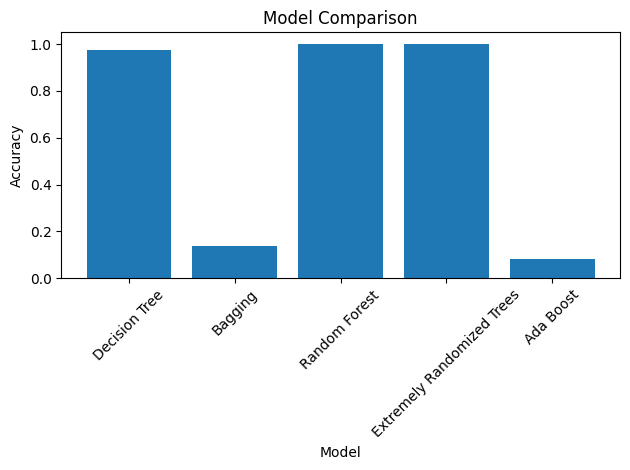

In [85]:
evaluate_models(target_variable='Code')


Best Model: Bagging
Decision Tree - Mean Accuracy: 0.0505, Std Deviation: 0.0051
Bagging - Mean Accuracy: 0.0556, Std Deviation: 0.0025
Random Forest - Mean Accuracy: 0.0587, Std Deviation: 0.0055
Extremely Randomized Trees - Mean Accuracy: 0.0544, Std Deviation: 0.0045
Ada Boost - Mean Accuracy: 0.0520, Std Deviation: 0.0054


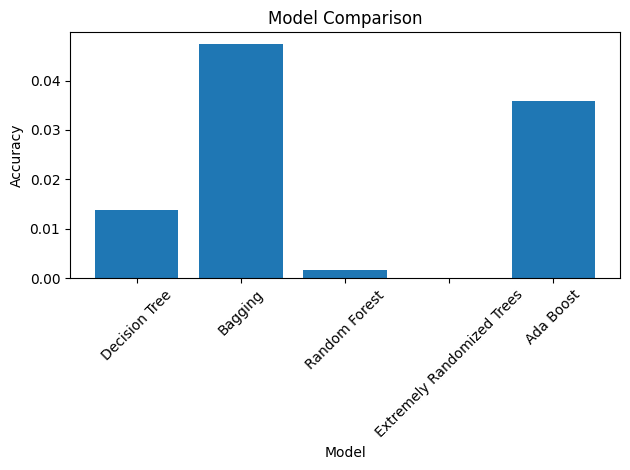

In [86]:
evaluate_models(target_variable='Year')

It is worth noting that RandomForests and ExtraTrees can be fitted in parallel on many cores as each tree is built independently of the others

With this, it is concluded that the model can respond differently to categorical and numerical variables. Models such as decision trees and random forests generally work well with categorical variables as long as they are properly coded, while other models may need special treatment for categorical variables.

###Conclusion
In summary, through careful analysis and experimentation, we have identified a model that best suits our data and problem according to year and code. The journey doesn't end here—fine-tuning, cross-validation, and practical deployment are steps we should undertake to ensure its optimal performance in real-world scenarios. With a solid foundation laid, we're poised to make informed decisions and drive impactful outcomes.